In [11]:
import numpy as np # linear algebra

import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import io
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, max_error

In [12]:

df_all=pd.read_excel('https://github.com/ffcgomes/real-state-ML-models/blob/master/my-real-state-ML-model/data/Apto-Set16-Out20.xls?raw=true',sheet_name='Sheet1')
df_all.head()

,NI,End,Complemento,Bairro,Informante,Telefone,Lat,Long,Area,Ofer-Trans,Faixa-Idade,Data,Vagas,Andar,Cons-Unid,Cons-Predio,Pad-Unid,Pad-Predio,Quartos,WCS,Elevadores,Renda,Valor-Total,Portaria,Piscina,Esporte,Home-Club,Valor-Unit,Municipio,Regional,Empresa,Idade
0,2017090111052017082704,"E, 420, BL., AP.1ANDAR (EDSON QUEIROZ)",RES BOSQUE ÁGUA FRIA -,EDSON QUEIROZ,PHILLIPE,(85) 98677-5530,-3.77374,-38.4662,62.00,2,> 20 <= 50,211,1.0,1.0,3,3.0,4,4.0,3,3,0.0,1647.50,130000.0,1,0,0,0,2096.77,FORTALEZA,6.0,GRAAL ENG E PROJETOS LTDA,35
1,2018111907532018102154,"EDUARDO GARCIA, 1100, BL., AP. (ALDEOTA)",EDIFÍCIO ATALAIA - (COD. AP0835),ALDEOTA,SANDRELI MIRANDA,(85) 99768-1010,-3.74171,-38.4891,87.00,2,<= 5,211,3.0,1.0,5,2.0,4,4.0,3,1,1.0,2733.63,340000.0,1,0,0,0,3908.05,FORTALEZA,2.0,NILDOMAR MONTE E SILVA - ME,1
2,2019041007112019031002,"MOZART PINHEIRO DE LUCENA, 100, BL., AP.201 (V...",RESIDENCIAL SANTÍSSIMA TRINDADE - 3º andar,VILA VELHA,Marcelino freitas,(85) 3236-4444,-3.70567,-38.5934,43.83,2,> 5 <= 10,231,1.0,1.0,5,5.0,3,3.0,2,1,0.0,2245.10,150000.0,0,0,1,0,3422.31,FORTALEZA,1.0,RICARDO DE OLIVEIRA DELGADO,7
3,2019041007112019031002,"MOZART PINHEIRO DE LUCENA, 100, BL., AP.201 (V...",RESIDENCIAL SANTÍSSIMA TRINDADE - 3º andar,VILA VELHA,Marcelino freitas,(85) 3236-4444,-3.70567,-38.5934,43.83,2,> 5 <= 10,231,1.0,1.0,5,5.0,3,3.0,2,2,0.0,2245.10,150000.0,0,0,1,0,3422.31,FORTALEZA,1.0,RICARDO DE OLIVEIRA DELGADO,7
4,2017011709552016121632,"ANTONIO ATUALPA RODRIGUES, 100, BL., AP.540 (A...",RES VG FUN -,PRAIA DO FUTURO II,JAMILLY,(85) 99999-7318,-3.75944,-38.4431,59.00,1,<= 5,204,1.0,1.0,6,6.0,5,5.0,2,2,4.0,3301.00,300000.0,1,0,1,0,5119.00,FORTALEZA,2.0,ITA ENGENHARIA LTDA,1


In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10284 entries, 0 to 10283
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NI           10284 non-null  object 
 1   End          10284 non-null  object 
 2   Complemento  10284 non-null  object 
 3   Bairro       10283 non-null  object 
 4   Informante   10277 non-null  object 
 5   Telefone     10277 non-null  object 
 6   Lat          10284 non-null  object 
 7   Long         10284 non-null  object 
 8   Area         10284 non-null  float64
 9   Ofer-Trans   10284 non-null  int64  
 10  Faixa-Idade  10284 non-null  object 
 11  Data         10284 non-null  int64  
 12  Vagas        10278 non-null  float64
 13  Andar        10282 non-null  float64
 14  Cons-Unid    10284 non-null  int64  
 15  Cons-Predio  10279 non-null  float64
 16  Pad-Unid     10284 non-null  int64  
 17  Pad-Predio   10279 non-null  float64
 18  Quartos      10284 non-null  int64  
 19  WCS 

#Definir o Municipio

In [14]:
municipio="FORTALEZA"

In [15]:
#municipio = input("Qual o Municipio? ")
df=df_all[(df_all.Municipio == municipio)]


In [16]:
df=df.drop(["NI","End","Complemento","Bairro","Informante","Telefone","Faixa-Idade","Valor-Total","Municipio","Regional","Empresa"],axis=1)

#dados_imovel=dados_imovel.drop(["NI","End","Complemento","Bairro","Informante","Telefone","Faixa-Idade","Valor-Total","Valor-Unit","Municipio","Regional","Empresa"],axis=1)
#dados_imovel

In [17]:
df['Lat']=df['Lat'].astype(str)
df['Lat']=df['Lat'].str.replace(',','.')
df['Lat']=df['Lat'].astype(float)

df['Long']=df['Long'].astype(str)
df['Long']=df['Long'].str.replace(',','.')
df['Long']=df['Long'].astype(float)

In [18]:
 df.isnull().sum().sort_values(ascending=False)

Pad-Predio     5
Cons-Predio    5
Elevadores     5
Vagas          4
Renda          1
Andar          1
Long           0
Area           0
Ofer-Trans     0
Data           0
Cons-Unid      0
Idade          0
Pad-Unid       0
Valor-Unit     0
Quartos        0
WCS            0
Portaria       0
Piscina        0
Esporte        0
Home-Club      0
Lat            0
dtype: int64

In [19]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Lat            0
Long           0
Area           0
Ofer-Trans     0
Data           0
Vagas          0
Andar          0
Cons-Unid      0
Cons-Predio    0
Pad-Unid       0
Pad-Predio     0
Quartos        0
WCS            0
Elevadores     0
Renda          0
Portaria       0
Piscina        0
Esporte        0
Home-Club      0
Valor-Unit     0
Idade          0
dtype: int64

In [20]:
df

,Lat,Long,Area,Ofer-Trans,Data,Vagas,Andar,Cons-Unid,Cons-Predio,Pad-Unid,Pad-Predio,Quartos,WCS,Elevadores,Renda,Portaria,Piscina,Esporte,Home-Club,Valor-Unit,Idade
0,-3.773745,-38.466235,62.00,2,211,1.0,1.0,3,3.0,4,4.0,3,3,0.0,1647.50,1,0,0,0,2096.77,35
1,-3.741710,-38.489060,87.00,2,211,3.0,1.0,5,2.0,4,4.0,3,1,1.0,2733.63,1,0,0,0,3908.05,1
2,-3.705672,-38.593352,43.83,2,231,1.0,1.0,5,5.0,3,3.0,2,1,0.0,2245.10,0,0,1,0,3422.31,7
3,-3.705672,-38.593352,43.83,2,231,1.0,1.0,5,5.0,3,3.0,2,2,0.0,2245.10,0,0,1,0,3422.31,7
4,-3.759445,-38.443056,59.00,1,204,1.0,1.0,6,6.0,5,5.0,2,2,4.0,3301.00,1,0,1,0,5119.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10275,-3.722187,-38.510971,98.98,1,217,2.0,6.0,6,6.0,5,5.0,3,3,3.0,4065.44,1,1,1,0,5758.74,1
10276,-3.795750,-38.537250,45.37,1,221,1.0,4.0,5,3.0,4,4.0,2,1,0.0,3038.00,1,0,0,0,2865.33,15
10278,-3.740140,-38.481345,69.50,2,221,1.0,21.0,6,6.0,6,5.0,3,2,2.0,7021.44,1,1,1,0,5179.86,1
10281,-3.746237,-38.506895,100.76,2,220,2.0,3.0,3,3.0,4,4.0,3,2,2.0,9827.00,1,0,0,0,3473.60,35


In [21]:

for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Lat outliers = 0.00%
Column Long outliers = 0.02%
Column Area outliers = 5.51%
Column Ofer-Trans outliers = 0.00%
Column Data outliers = 0.05%
Column Vagas outliers = 3.44%
Column Andar outliers = 1.31%
Column Cons-Unid outliers = 23.76%
Column Cons-Predio outliers = 23.71%
Column Pad-Unid outliers = 100.00%
Column Pad-Predio outliers = 100.00%
Column Quartos outliers = 0.13%
Column WCS outliers = 100.00%
Column Elevadores outliers = 1.24%
Column Renda outliers = 1.40%
Column Portaria outliers = 100.00%
Column Piscina outliers = 0.00%
Column Esporte outliers = 0.00%
Column Home-Club outliers = 100.00%
Column Valor-Unit outliers = 0.97%
Column Idade outliers = 0.99%


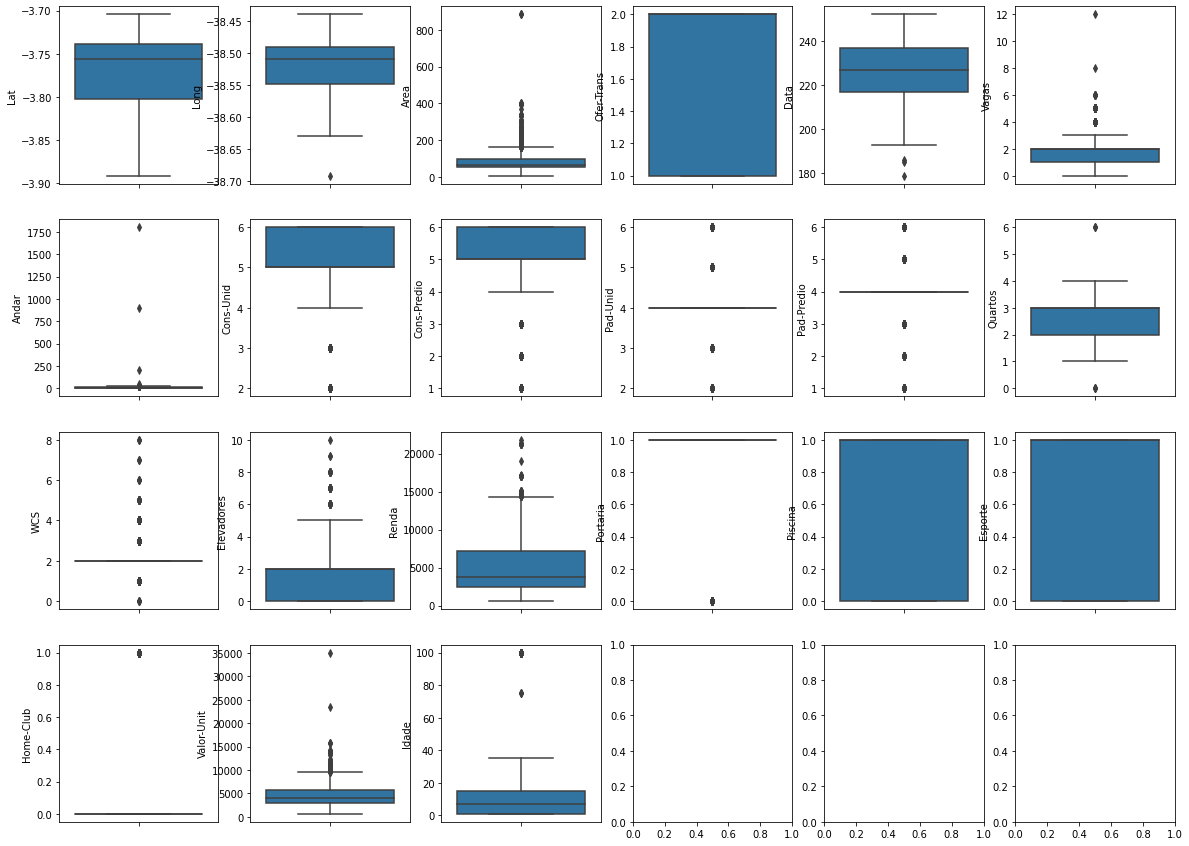

In [22]:
fig, axs = plt.subplots(ncols=6, nrows=4, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1

In [23]:

df.sort_values(by=['Area'],ascending=False)


,Lat,Long,Area,Ofer-Trans,Data,Vagas,Andar,Cons-Unid,Cons-Predio,Pad-Unid,Pad-Predio,Quartos,WCS,Elevadores,Renda,Portaria,Piscina,Esporte,Home-Club,Valor-Unit,Idade
3814,-3.729599,-38.501322,883.32,2,220,6.0,14.0,5,5.0,6,6.0,4,8,4.0,17031.42,1,1,1,1,15849.30,15
3815,-3.729599,-38.501322,883.32,2,220,6.0,14.0,5,5.0,6,6.0,4,2,4.0,17031.42,1,1,1,1,15849.30,15
8016,-3.729599,-38.501322,883.32,2,220,12.0,14.0,5,5.0,6,6.0,4,8,4.0,17031.42,1,1,1,1,15849.30,15
5472,-3.725186,-38.505638,401.00,2,221,5.0,21.0,5,5.0,6,6.0,4,5,2.0,9631.29,1,1,1,0,13715.71,1
5473,-3.725186,-38.505638,401.00,2,221,5.0,21.0,5,5.0,6,6.0,4,4,2.0,9631.29,1,1,1,0,13715.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,-3.789062,-38.542444,34.87,1,210,1.0,1.0,3,3.0,3,3.0,1,2,0.0,1309.52,0,0,0,0,3297.96,35
1338,-3.726944,-38.516944,34.70,2,211,1.0,1.0,3,3.0,4,4.0,1,2,0.0,3047.15,0,1,0,0,4466.86,15
7997,-3.843251,-38.494225,32.47,2,219,1.0,1.0,3,5.0,4,4.0,0,1,0.0,2064.73,0,0,0,0,4619.65,1
7833,-3.742376,-38.566957,17.41,1,233,2.0,12.0,5,3.0,4,4.0,3,2,2.0,4117.18,1,1,1,0,23549.68,7


In [24]:
#Excluir Outliers de Andar
df=df.drop([9938,8146,8542,9649])
#Excluir Outliers de Area
df=df.drop([3814,3815,8016])
#Excluir Outliers de Valor Unitario
df=df.drop([7739,7833])

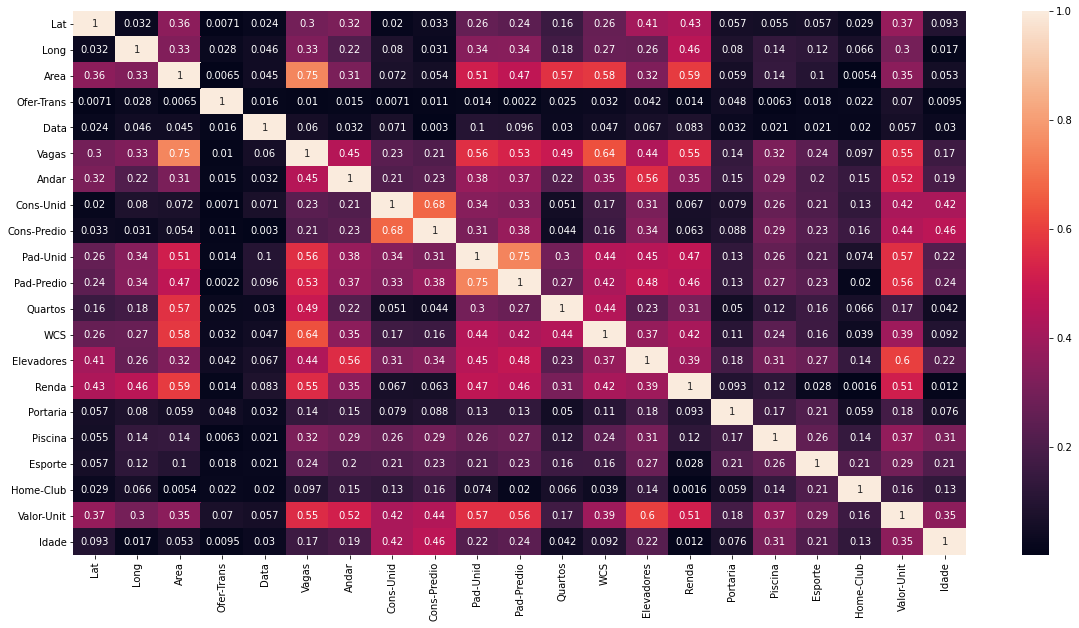

In [25]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

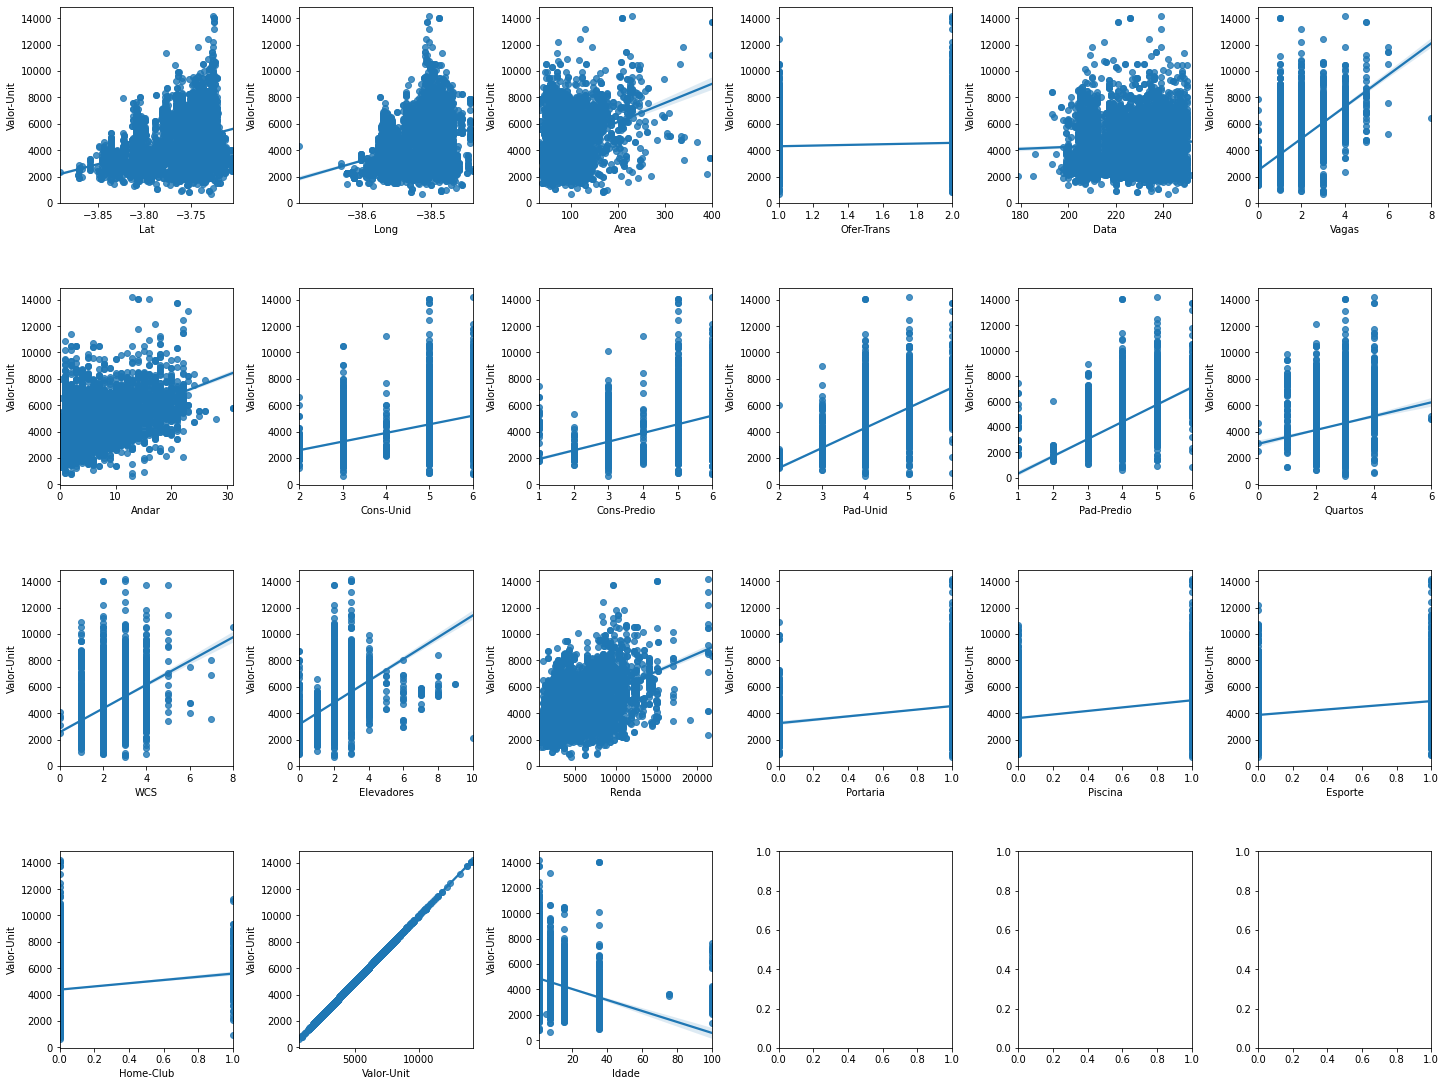

In [26]:

fig, axs = plt.subplots(ncols=6, nrows=4, figsize=(20, 15))
index = 0
axs = axs.flatten()
for i, k in enumerate(df.columns):
    sns.regplot(y=df['Valor-Unit'], x=df[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)




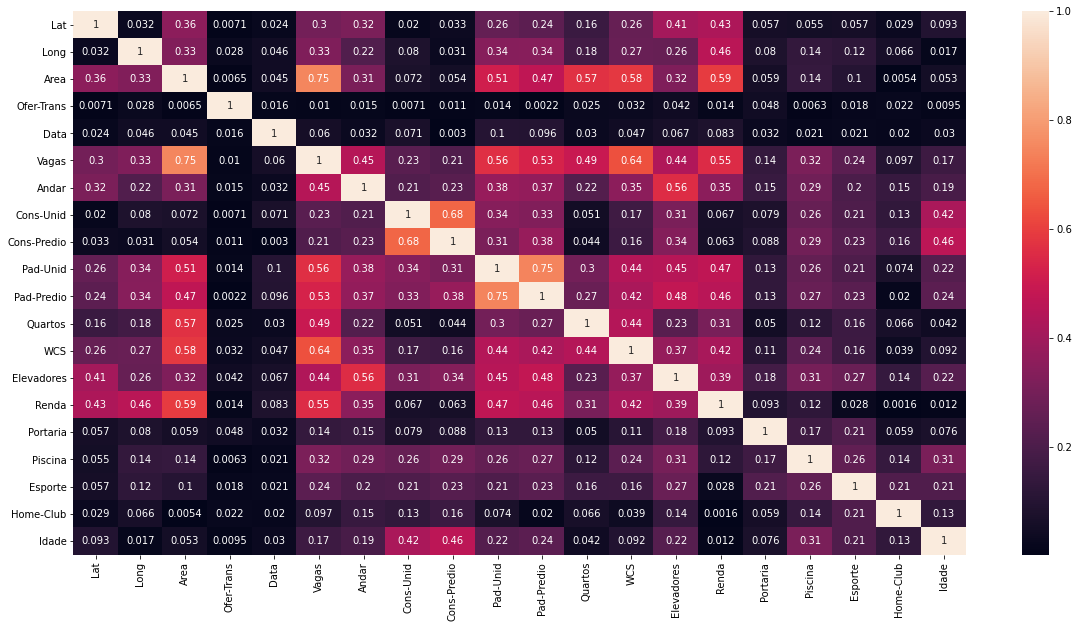

In [27]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.drop('Valor-Unit',axis=1).corr().abs(),  annot=True)

##Normalização dos dados

In [28]:
x=df.drop(['Valor-Unit'],axis=1)
y=df['Valor-Unit']


# Define which columns should be encoded vs scaled
columns_to_encode = ['Ofer-Trans','Cons-Unid','Cons-Predio','Pad-Unid','Pad-Predio','Portaria','Piscina','Esporte','Home-Club']
columns_to_scale  = ['Lat', 'Long','Area','Data','Vagas','Andar','Quartos','WCS','Elevadores','Renda','Idade']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(x[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(x[columns_to_encode])

# Scale and Encode Separate Columns for Target Datas
#scaled_imovel  = scaler.fit_transform(dados_imovel[columns_to_scale]) 
#encoded_imovel =    ohe.fit_transform(dados_imovel[columns_to_encode])

scaled_df=pd.DataFrame.from_records(scaled_columns)
scaled_df.columns=['Lat', 'Long','Area','Data','Vagas','Andar','Quartos','WCS','Elevadores','Renda','Idade']


#scaled_imovel=pd.DataFrame.from_records(scaled_imovel)
#scaled_imovel.columns=['Lat', 'Long','Area','Data','Vagas','Andar','Quartos','WCS','Elevadores','Renda','Idade']

scaled_df



,Lat,Long,Area,Data,Vagas,Andar,Quartos,WCS,Elevadores,Renda,Idade
0,-0.164461,1.428272,-0.500327,-1.132788,-0.789025,-0.938915,0.637298,1.142911,-1.207851,-0.964072,1.687203
1,0.716778,0.792495,0.073927,-1.132788,1.642724,-0.938915,0.637298,-1.419168,-0.439559,-0.644876,-0.646647
2,1.708134,-2.112500,-0.917695,0.358027,-0.789025,-0.938915,-1.060327,-1.419168,-1.207851,-0.788447,-0.234791
3,1.708134,-2.112500,-0.917695,0.358027,-0.789025,-0.938915,-1.060327,-0.138129,-1.207851,-0.788447,-0.234791
4,0.228912,2.073910,-0.569238,-1.654573,-0.789025,-0.938915,-1.060327,-0.138129,1.865319,-0.478135,-0.646647
...,...,...,...,...,...,...,...,...,...,...,...
5541,1.253829,0.182176,0.349110,-0.685543,0.426849,-0.063192,0.637298,1.142911,1.097026,-0.253479,-0.646647
5542,-0.769788,-0.549810,-0.882321,-0.387381,-0.789025,-0.413481,-1.060327,-1.419168,-1.207851,-0.555427,0.314350
5543,0.759966,1.007392,-0.328051,-0.387381,-0.789025,2.563976,0.637298,-0.138129,0.328734,0.615241,-0.646647
5544,0.592246,0.295711,0.389997,-0.461921,0.426849,-0.588626,0.637298,-0.138129,0.328734,1.439749,1.687203


In [29]:
df['Cons-Unid'].min()

2

In [30]:
encoded_df=pd.DataFrame.from_records(encoded_columns)
encoded_df.columns=['Of1', 'Of2','Cu2','Cu3','Cu4','Cu5','Cu6','Cp1','Cp2','Cp3','Cp4','Cp5','Cp6','Pu2','Pu3','Pu4','Pu5','Pu6',
                   'Pp1','Pp2','Pp3','Pp4','Pp5','Pp6','Por1','Por2','Pisc1','Pisc2','Esp1','Esp2','Home1','Home2']
encoded_df

,Of1,Of2,Cu2,Cu3,Cu4,Cu5,Cu6,Cp1,Cp2,Cp3,Cp4,Cp5,Cp6,Pu2,Pu3,Pu4,Pu5,Pu6,Pp1,Pp2,Pp3,Pp4,Pp5,Pp6,Por1,Por2,Pisc1,Pisc2,Esp1,Esp2,Home1,Home2
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5541,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
5542,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5543,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
5544,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [31]:
# Concatenate (Column-Bind) Processed Columns Back Together
x = np.concatenate([scaled_columns, encoded_columns], axis=1)
x = pd.concat([scaled_df,encoded_df],axis=1, sort=False)
x

,Lat,Long,Area,Data,Vagas,Andar,Quartos,WCS,Elevadores,Renda,Idade,Of1,Of2,Cu2,Cu3,Cu4,Cu5,Cu6,Cp1,Cp2,Cp3,Cp4,Cp5,Cp6,Pu2,Pu3,Pu4,Pu5,Pu6,Pp1,Pp2,Pp3,Pp4,Pp5,Pp6,Por1,Por2,Pisc1,Pisc2,Esp1,Esp2,Home1,Home2
0,-0.164461,1.428272,-0.500327,-1.132788,-0.789025,-0.938915,0.637298,1.142911,-1.207851,-0.964072,1.687203,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.716778,0.792495,0.073927,-1.132788,1.642724,-0.938915,0.637298,-1.419168,-0.439559,-0.644876,-0.646647,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.708134,-2.112500,-0.917695,0.358027,-0.789025,-0.938915,-1.060327,-1.419168,-1.207851,-0.788447,-0.234791,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.708134,-2.112500,-0.917695,0.358027,-0.789025,-0.938915,-1.060327,-0.138129,-1.207851,-0.788447,-0.234791,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.228912,2.073910,-0.569238,-1.654573,-0.789025,-0.938915,-1.060327,-0.138129,1.865319,-0.478135,-0.646647,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5541,1.253829,0.182176,0.349110,-0.685543,0.426849,-0.063192,0.637298,1.142911,1.097026,-0.253479,-0.646647,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
5542,-0.769788,-0.549810,-0.882321,-0.387381,-0.789025,-0.413481,-1.060327,-1.419168,-1.207851,-0.555427,0.314350,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5543,0.759966,1.007392,-0.328051,-0.387381,-0.789025,2.563976,0.637298,-0.138129,0.328734,0.615241,-0.646647,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
5544,0.592246,0.295711,0.389997,-0.461921,0.426849,-0.588626,0.637298,-0.138129,0.328734,1.439749,1.687203,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [32]:
dados_imovel=x.tail(1)
dados_imovel

,Lat,Long,Area,Data,Vagas,Andar,Quartos,WCS,Elevadores,Renda,Idade,Of1,Of2,Cu2,Cu3,Cu4,Cu5,Cu6,Cp1,Cp2,Cp3,Cp4,Cp5,Cp6,Pu2,Pu3,Pu4,Pu5,Pu6,Pp1,Pp2,Pp3,Pp4,Pp5,Pp6,Por1,Por2,Pisc1,Pisc2,Esp1,Esp2,Home1,Home2
5545,0.388009,0.747093,-0.642513,1.923382,-0.789025,-0.413481,-1.060327,-1.419168,6.475073,0.526359,-0.372076,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


#Feature Selection

##Mean Absolute Difference (MAD)

<BarContainer object of 43 artists>

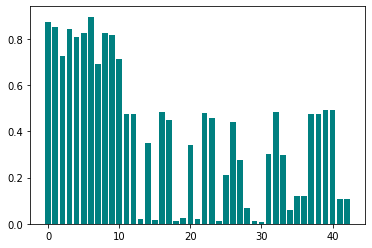

In [33]:
#Calculate MAD
mean_abs_diff = np.sum(np.abs(x-np.mean(x, axis=0)),axis=0)/x.shape[0]
#Plot te barchart
plt.bar(np.arange(x.shape[1]),mean_abs_diff, color='teal')

#Linear Regression


##Recursive Feature elimination (RFE)

In [34]:
from sklearn.feature_selection import RFE
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

r_linear = linear_model.LinearRegression()
r_linear.fit(X_train,y_train)


# create the RFE model and select n attributes
rfe = RFE(r_linear, 20)
rfe = rfe.fit(X_train, y_train)

# check selected features
features_bool = np.array(rfe.support_)
features = np.array(X_train.columns)
result = features[features_bool]
print(result)


# check ranking of features
features_rank = rfe.ranking_
print(features_rank)



['Lat' 'Area' 'Vagas' 'Andar' 'Elevadores' 'Renda' 'Of1' 'Cu2' 'Cu5' 'Cu6'
 'Cp2' 'Cp3' 'Cp6' 'Pu2' 'Pu3' 'Pu6' 'Pp5' 'Pp6' 'Pisc2' 'Esp1']
[ 1 19  1 21  1  1  9 24  1  1  3  1  7  1 16 23  1  1 20  1  1  5 17  1
  1  1  2 22  1 13  8 11 12  1  1 18  4 14  1  1 10 15  6]


##Métricas com as features selecionadas

In [35]:


x_rfe = x[list(result)]
imovel_rfe=dados_imovel[result]


X_train, X_test, y_train, y_test = train_test_split(x_rfe, y, random_state = 0)


r_linear = linear_model.LinearRegression()
r_linear.fit(X_train,y_train)

r_linear_train_pred = r_linear.predict(X_train)
r_linear_test_pred = r_linear.predict(X_test)

r_linear_train_score = r2_score(y_train,r_linear_train_pred)
r_linear_test_score = r2_score(y_test,r_linear_test_pred)

#r2_train_score_map['r_linear_train_score']=r_linear_train_score
#r2_test_score_map['r_linear_test_score']=r_linear_test_score
#vlr_unit_map['r_linear']=r_linear.predict(dados_imovel)

print(r_linear_train_score)
print(r_linear_test_score)
print(r_linear.predict(imovel_rfe))   

0.6418955943678557
0.6796363516629286
[8045.49811497]


In [36]:
r2_train_score_map={}
r2_test_score_map={}
vlr_unit_map={}

##Métricas com todas as features

In [37]:
#x=df.drop(['Valor-Unit'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)


r_linear = linear_model.LinearRegression()
r_linear.fit(X_train,y_train)

r_linear_train_pred = r_linear.predict(X_train)
r_linear_test_pred = r_linear.predict(X_test)

r_linear_train_score = r2_score(y_train,r_linear_train_pred)
r_linear_test_score = r2_score(y_test,r_linear_test_pred)

r2_train_score_map['r_linear_train_score']=r_linear_train_score
r2_test_score_map['r_linear_test_score']=r_linear_test_score
vlr_unit_map['r_linear']=r_linear.predict(dados_imovel)

print(r_linear_train_score)
print(r_linear_test_score)  
print(r_linear.predict(dados_imovel))                       


0.6538701615904577
0.6984192791606352
[8150.27613366]


##Feature Importance

In [38]:
importance = r_linear.coef_
print(importance)

[ 255.78888108   60.9005822  -332.35676189   21.15720476  401.20820966
  194.98267411 -125.91119516    8.74335555  251.27005527  428.40623555
 -167.7978186  -133.3890131   133.3890131  -376.69880874  -91.12063008
   10.92259225  139.94530357  316.95154299   41.049879   -454.31430213
  -88.42104352  -47.44734175  126.31510482  422.81770359  -91.24075943
 -282.744092   -180.42928479  -19.74692419  574.16106041  -62.15259028
 -407.67637235 -224.43033998 -157.66205737  378.44805698  473.47330301
  -63.28204457   63.28204457  -97.37932769   97.37932769 -127.12546096
  127.12546096  -79.96540884   79.96540884]


[ 255.78888108   60.9005822  -332.35676189   21.15720476  401.20820966
  194.98267411 -125.91119516    8.74335555  251.27005527  428.40623555
 -167.7978186  -133.3890131   133.3890131  -376.69880874  -91.12063008
   10.92259225  139.94530357  316.95154299   41.049879   -454.31430213
  -88.42104352  -47.44734175  126.31510482  422.81770359  -91.24075943
 -282.744092   -180.42928479  -19.74692419  574.16106041  -62.15259028
 -407.67637235 -224.43033998 -157.66205737  378.44805698  473.47330301
  -63.28204457   63.28204457  -97.37932769   97.37932769 -127.12546096
  127.12546096  -79.96540884   79.96540884]
Feature: 0, Score: 255.78888
Feature: 1, Score: 60.90058
Feature: 2, Score: -332.35676
Feature: 3, Score: 21.15720
Feature: 4, Score: 401.20821
Feature: 5, Score: 194.98267
Feature: 6, Score: -125.91120
Feature: 7, Score: 8.74336
Feature: 8, Score: 251.27006
Feature: 9, Score: 428.40624
Feature: 10, Score: -167.79782
Feature: 11, Score: -133.38901
Feature: 12, Score: 133.38901
Feature:

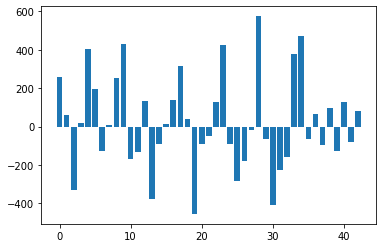

In [39]:
importance = r_linear.coef_
print(importance)

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#KNN

In [40]:
kf = KFold(n_splits=2)
knn = KNeighborsRegressor(n_neighbors=7)
knn = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')

knn.fit(X_train,y_train)

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

knn_train_score = r2_score(y_train,knn_train_pred)
knn_test_score = r2_score(y_test,knn_test_pred)

r2_train_score_map['knn_train_score']=knn_train_score
r2_test_score_map['knn_test_score']=knn_test_score
vlr_unit_map['knn']=knn.predict(dados_imovel)

print(knn_train_score)
print(knn_test_score)                                
print(knn.predict(dados_imovel))


0.80353312925958
0.7303877928241046
[4932.554]


#Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

dtree.fit(X_train,y_train)

dtree_train_pred = dtree.predict(X_train)
dtree_test_pred = dtree.predict(X_test)

dtree_train_score = r2_score(y_train,dtree_train_pred)
dtree_test_score = r2_score(y_test,dtree_test_pred)

r2_train_score_map['dtree_train_score']=dtree_train_score
r2_test_score_map['dtree_test_score']=dtree_test_score
vlr_unit_map['dtree']=dtree.predict(dados_imovel)

print(dtree_train_score)
print(dtree_test_score)
print(dtree.predict(dados_imovel))

0.9968104380325538
0.6587799000673682
[2096.77]


Feature: 0, Score: 0.09328
Feature: 1, Score: 0.05833
Feature: 2, Score: 0.06595
Feature: 3, Score: 0.02976
Feature: 4, Score: 0.02298
Feature: 5, Score: 0.03145
Feature: 6, Score: 0.00867
Feature: 7, Score: 0.00313
Feature: 8, Score: 0.39151
Feature: 9, Score: 0.06426
Feature: 10, Score: 0.06798
Feature: 11, Score: 0.00297
Feature: 12, Score: 0.00489
Feature: 13, Score: 0.00034
Feature: 14, Score: 0.00251
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00139
Feature: 17, Score: 0.00090
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00017
Feature: 20, Score: 0.00159
Feature: 21, Score: 0.00005
Feature: 22, Score: 0.00508
Feature: 23, Score: 0.00754
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00105
Feature: 26, Score: 0.00136
Feature: 27, Score: 0.00101
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.02758
Feature: 32, Score: 0.07354
Feature: 33, Score: 0.00180
Feature: 34, Score: 0.00097
Feature: 35, Score: 0.00049
Fe

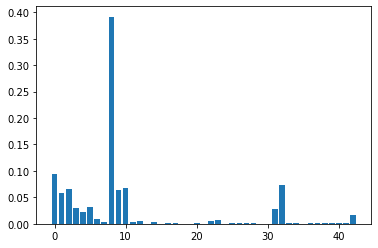

In [42]:
importance = dtree.feature_importances_
importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
r_forest = RandomForestRegressor()

r_forest.fit(X_train,y_train)

r_forest_train_pred = r_forest.predict(X_train)
r_forest_test_pred = r_forest.predict(X_test)

r_forest_train_score = r2_score(y_train,r_forest_train_pred)
r_forest_test_score = r2_score(y_test,r_forest_test_pred)

r2_train_score_map['r_forest_train_score']=r_forest_train_score
r2_test_score_map['r_forest_test_score']=r_forest_test_score
vlr_unit_map['r_forest']=r_forest.predict(dados_imovel)

print(r_forest_train_score)
print(r_forest_test_score)
print(r_forest.predict(dados_imovel))

0.9719261520848331
0.831046293323624
[3721.977]


Feature: 0, Score: 0.08758
Feature: 1, Score: 0.05569
Feature: 2, Score: 0.06046
Feature: 3, Score: 0.02841
Feature: 4, Score: 0.01975
Feature: 5, Score: 0.03484
Feature: 6, Score: 0.00536
Feature: 7, Score: 0.00732
Feature: 8, Score: 0.39187
Feature: 9, Score: 0.08524
Feature: 10, Score: 0.06484
Feature: 11, Score: 0.00315
Feature: 12, Score: 0.00308
Feature: 13, Score: 0.00038
Feature: 14, Score: 0.00474
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00290
Feature: 17, Score: 0.00561
Feature: 18, Score: 0.00007
Feature: 19, Score: 0.00025
Feature: 20, Score: 0.00190
Feature: 21, Score: 0.00012
Feature: 22, Score: 0.00231
Feature: 23, Score: 0.01073
Feature: 24, Score: 0.00009
Feature: 25, Score: 0.00249
Feature: 26, Score: 0.00799
Feature: 27, Score: 0.00165
Feature: 28, Score: 0.00139
Feature: 29, Score: 0.00007
Feature: 30, Score: 0.00003
Feature: 31, Score: 0.01631
Feature: 32, Score: 0.06788
Feature: 33, Score: 0.00260
Feature: 34, Score: 0.00077
Feature: 35, Score: 0.00127
Fe

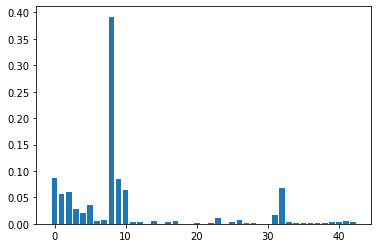

In [44]:
# get importance
importance = r_forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#Gradient Boosting Regressor

In [45]:
gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)

#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#gbr = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')


gbr.fit(X_train,y_train)

gbr_train_pred = gbr.predict(X_train)
gbr_test_pred = gbr.predict(X_test)

gbr_train_score = r2_score(y_train,gbr_train_pred)
gbr_test_score = r2_score(y_test,gbr_test_pred)

r2_train_score_map['gbr_train_score']=gbr_train_score
r2_test_score_map['gbr_test_score']=gbr_test_score
vlr_unit_map['gbr']=gbr.predict(dados_imovel)


print(r2_train_score_map)
print(r2_test_score_map)
print(vlr_unit_map)



{'r_linear_train_score': 0.6538701615904577, 'knn_train_score': 0.80353312925958, 'dtree_train_score': 0.9968104380325538, 'r_forest_train_score': 0.9719261520848331, 'gbr_train_score': 0.6926048596396606}
{'r_linear_test_score': 0.6984192791606352, 'knn_test_score': 0.7303877928241046, 'dtree_test_score': 0.6587799000673682, 'r_forest_test_score': 0.831046293323624, 'gbr_test_score': 0.7115227699522435}
{'r_linear': array([8150.27613366]), 'knn': array([4932.554]), 'dtree': array([2096.77]), 'r_forest': array([3721.977]), 'gbr': array([5634.50590642])}


Feature: 0, Score: 0.06141
Feature: 1, Score: 0.00896
Feature: 2, Score: 0.02231
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.04067
Feature: 5, Score: 0.04725
Feature: 6, Score: 0.00112
Feature: 7, Score: 0.00063
Feature: 8, Score: 0.46274
Feature: 9, Score: 0.13074
Feature: 10, Score: 0.11991
Feature: 11, Score: 0.00041
Feature: 12, Score: 0.00081
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00931
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00574
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.01906
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00634
Feature: 27, Score: 0.00048
Feature: 28, Score: 0.00456
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.04175
Feature: 33, Score: 0.00976
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

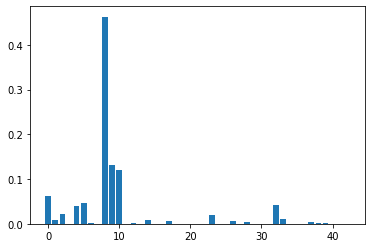

In [46]:
# get importance
importance = gbr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

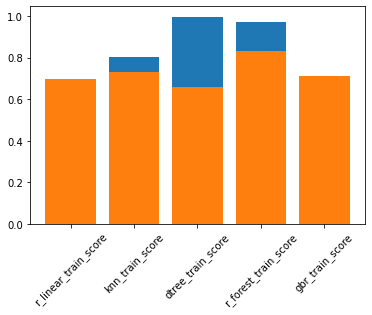

In [47]:

keys_train = r2_train_score_map.keys()
values_train = r2_train_score_map.values()
plt.bar(keys_train, values_train)

#keys_test = r2_test_score_map.keys()
values_test = r2_test_score_map.values()
plt.bar(keys_train, values_test)

plt.xticks(rotation=45)

In [48]:

r2_test_df = pd.DataFrame.from_dict(r2_test_score_map, orient='index',columns=['Scores'])
r2_test_df



,Scores
r_linear_test_score,0.698419
knn_test_score,0.730388
dtree_test_score,0.658780
r_forest_test_score,0.831046
gbr_test_score,0.711523


In [49]:
r2_train_df = pd.DataFrame.from_dict(r2_train_score_map, orient='index',columns=['Scores'])
r2_train_df['Test Scores']=r2_test_df['Scores'].values
r2_train_df.columns = ['Train Scores', 'Test Scores']
r2_train_df.reset_index

r2_train_df.index = r2_train_df.index.rename('Models')
r2_train_df

,Train Scores,Test Scores
Models,,
r_linear_train_score,0.653870,0.698419
knn_train_score,0.803533,0.730388
dtree_train_score,0.996810,0.658780
r_forest_train_score,0.971926,0.831046
gbr_train_score,0.692605,0.711523


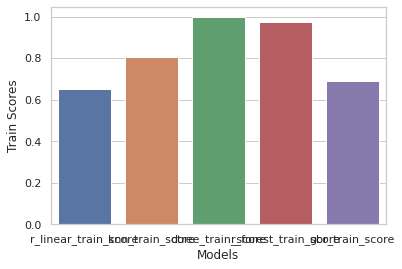

In [50]:
sns.set_theme(style="whitegrid")

#penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.barplot(
    data=r2_train_df,
    x=r2_train_df.index, y="Train Scores")

#g.set_axis_labels("Scores")
#g.legend.set_title("Scores")

#Selecting The Best Model

In [53]:
print('Valor do Imóvel:R$ %000.000f,00'% (r_linear.predict(dados_imovel)*dados_imovel['Area']))


Valor do Imóvel:R$ -5237,00
